In [1]:
import json 
import networkx as nx
  

from conjecture.consolidated_functions import *
from conjecture.all_valid_orderings import *
from conjecture.optimization_functions import *
from iterative_heuristic.modified_etf import Mod_ETF
from iterative_heuristic.consolidated import *
from iterative_heuristic.approximate_speeds import *
from makespan_energy.construct_graph_util import *
from makespan_energy.visualization_util import *
import networkx as nx
import numpy as np
import math
import plotly.express as px
import pandas as pd 

In [2]:
# Construct DAGs

file_list = ['soykb-chameleon-10fastq-10ch-001.json',
'soykb-chameleon-10fastq-20ch-001.json',
'soykb-chameleon-20fastq-10ch-001.json',
'soykb-chameleon-20fastq-20ch-001.json',
'soykb-chameleon-30fastq-10ch-001.json',
'soykb-chameleon-30fastq-20ch-001.json',
'soykb-chameleon-40fastq-10ch-001.json',
'soykb-chameleon-40fastq-20ch-001.json',
'soykb-chameleon-50fastq-10ch-001.json',
'soykb-chameleon-50fastq-20ch-001.json']
    
G_list = []

for file in file_list:
    
    # Opening JSON file 
    f = open('pegasus-traces-master/soykb/chameleon-cloud/' + file) 

    # returns JSON object as  
    # a dictionary 
    data = json.load(f) 

    taskname_to_id = {}
    id_count = 0

    G = nx.DiGraph()

    for task in data['workflow']['jobs']:

        child_id = id_count
        id_count += 1
        taskname_to_id[task['name']] = child_id

        if not G.has_node(child_id):
                G.add_node(child_id)

        for parent in task['parents']:
            if parent in taskname_to_id:

                parent_id = taskname_to_id[parent]

            else:

                parent_id = id_count
                id_count += 1
                taskname_to_id[parent] = parent_id


            if not G.has_edge(parent_id, child_id):
                    G.add_edge(parent_id, child_id)
    print(len(G.nodes))

    
   
    G_list.append(G)
    
    # Closing file 
    f.close() 

96
156
176
286
256
416
336
546
416
676


In [3]:
G_list[0]

In [4]:
mrt = True
tie_breaking_rule = 2
plot = False

x = []
y = []
lbs= []
ubs = []

y_optimal = []
y_lb = []
bad_one = 0
box_whiskers_data = []
num_machines = 3
naives = []
heur = []
for G in G_list:
    
    
    ratio = []
    num_tasks = len(G.nodes)
    
    w = [1 for _ in range(num_tasks)]
    s = [1 for _ in range(num_tasks)]

    naive, true, order =iterative_and_naive_heuristic_no_ratio(num_machines, w, G, verbose=False)
    _, _, obj_opt, _ = get_objective_single_ordering(True, G, w, order, plot=plot, compare=False)
    d = get_optimal_schedule(mrt, G, num_machines, w, plot, verbose=False)
    # if solver was successful
    # and d["objective_task_scaling"] != 10000000
    #if obj_opt != 10000000 and d["objective_task_scaling"] != 10000000:
        
    x.append(num_tasks)
    heur.append(true)
    naives.append(naive)
    y.append(obj_opt)
    lbs.append(d["objective_task_scaling"])
    ub = obj_ub_precise = 2 * sum(psize_to_speed(ub_lst_graph(G, order)))
    ubs.append(ub)

apm 67.22.20.162_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          101
   Constants    :            0
   Variables    :         2424
   Intermediates:            0
   Connections  :          869
   Equations    :         1939
   Residuals    :         1939
 
 Number of state variables:           2424
 Number of total equations: -         2039
 Number of slack variables: -         1456
 ---------------------------------------
 Degrees of freedom       :          -1071
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

***************************************************************************

  76  3.4242803e+02 1.32e+02 9.91e+00  -3.6 4.95e+02    -  5.38e-02 1.82e-01h  1
  77  3.5556694e+02 1.16e+02 9.38e+00  -3.6 4.52e+02    -  3.81e-01 7.71e-01h  1
  78  3.6107359e+02 1.07e+02 8.67e+00  -3.6 6.49e+02    -  1.53e-02 7.60e-02h  1
  79  3.6296053e+02 1.03e+02 8.34e+00  -3.6 6.59e+02    -  1.03e-02 3.82e-02h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80  3.6495114e+02 9.27e+01 7.49e+00  -3.6 6.66e+02    -  5.92e-03 1.01e-01h  1
  81  3.6636149e+02 3.89e+01 1.37e+02  -3.6 6.70e+02    -  2.97e-02 5.81e-01h  1
  82  3.6769710e+02 3.72e+01 1.26e+02  -3.6 7.48e+02    -  3.49e-01 8.28e-02h  1
  83  3.6772669e+02 3.71e+01 1.25e+02  -3.6 1.05e+03    -  1.14e-01 2.83e-03h  1
  84  3.6798152e+02 3.62e+01 1.22e+02  -3.6 1.19e+03    -  4.64e-01 2.43e-02h  1
  85  3.6836244e+02 3.48e+01 1.18e+02  -3.6 2.19e+03    -  4.43e-02 4.18e-02h  1
  86  3.6862437e+02 3.38e+01 1.14e+02  -3.6 2.29e+03    -  2.84e-02 2.88e-02h  1
  87  3.6906074e+02 3.25e+01

apm 67.22.20.162_gk_model3 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          161
   Constants    :            0
   Variables    :         4144
   Intermediates:            0
   Connections  :         1409
   Equations    :         3359
   Residuals    :         3359
 
 Number of state variables:           4144
 Number of total equations: -         3519
 Number of slack variables: -         2576
 ---------------------------------------
 Degrees of freedom       :          -1951
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

***************************************************************************

apm 67.22.20.162_gk_model5 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          181
   Constants    :            0
   Variables    :         4589
   Intermediates:            0
   Connections  :         1589
   Equations    :         3704
   Residuals    :         3704
 
 Number of state variables:           4589
 Number of total equations: -         3884
 Number of slack variables: -         2821
 ---------------------------------------
 Degrees of freedom       :          -2116
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

***************************************************************************

apm 67.22.20.162_gk_model7 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          291
   Constants    :            0
   Variables    :         7859
   Intermediates:            0
   Connections  :         2579
   Equations    :         6424
   Residuals    :         6424
 
 Number of state variables:           7859
 Number of total equations: -         6714
 Number of slack variables: -         4991
 ---------------------------------------
 Degrees of freedom       :          -3846
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

***************************************************************************

Results
0 Speed: [5.3478967828] Ending Time: [0.186989388] Interval: [0.0, 0.18699] Task process time: 0.18699
1 Speed: [5.2535702145] Ending Time: [0.37733612491] Interval: [0.18699, 0.37734] Task process time: 0.19035
2 Speed: [5.1575187832] Ending Time: [0.5712277985] Interval: [0.37734, 0.57123] Task process time: 0.19389
3 Speed: [5.0596442561] Ending Time: [0.76887014227] Interval: [0.57123, 0.76887] Task process time: 0.19764
4 Speed: [4.9598387068] Ending Time: [0.97048959191] Interval: [0.76887, 0.97049] Task process time: 0.20162
5 Speed: [4.8579831203] Ending Time: [1.1763363243] Interval: [0.97049, 1.17634] Task process time: 0.20585
6 Speed: [1.0630145813] Ending Time: [2.1170571827] Interval: [1.17634, 2.11706] Task process time: 0.94072
7 Speed: [1.0630145813] Ending Time: [2.1170571827] Interval: [1.17634, 2.11706] Task process time: 0.94072
8 Speed: [1.0630145813] Ending Time: [2.1170571827] Interval: [1.17634, 2.11706] Task process time: 0.94072
9 Speed: [1.0630145813

apm 67.22.20.162_gk_model9 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          261
   Constants    :            0
   Variables    :         6754
   Intermediates:            0
   Connections  :         2309
   Equations    :         5469
   Residuals    :         5469
 
 Number of state variables:           6754
 Number of total equations: -         5729
 Number of slack variables: -         4186
 ---------------------------------------
 Degrees of freedom       :          -3161
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

***************************************************************************

apm 67.22.20.162_gk_model11 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          421
   Constants    :            0
   Variables    :        11574
   Intermediates:            0
   Connections  :         3749
   Equations    :         9489
   Residuals    :         9489
 
 Number of state variables:          11574
 Number of total equations: -         9909
 Number of slack variables: -         7406
 ---------------------------------------
 Degrees of freedom       :          -5741
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

**************************************************************************

apm 67.22.20.162_gk_model13 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          341
   Constants    :            0
   Variables    :         8919
   Intermediates:            0
   Connections  :         3029
   Equations    :         7234
   Residuals    :         7234
 
 Number of state variables:           8919
 Number of total equations: -         7574
 Number of slack variables: -         5551
 ---------------------------------------
 Degrees of freedom       :          -4206
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

**************************************************************************

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70  1.3625836e+03 9.01e-02 3.40e+00  -3.4 3.89e+00    -  1.00e+00 7.90e-01h  1
  71  1.3625869e+03 2.31e-02 9.59e-01  -3.3 9.44e-01    -  1.00e+00 8.48e-01h  1
  72  1.3622892e+03 5.05e-03 1.75e-01  -4.5 1.51e+00    -  1.00e+00 8.97e-01h  1
  73  1.3622542e+03 7.21e-05 2.83e-03  -5.8 2.60e-01    -  1.00e+00 1.00e+00h  1
  74  1.3622535e+03 2.87e-08 1.04e-06  -7.9 5.18e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 74

                                   (scaled)                 (unscaled)
Objective...............:   1.3622534803600263e+03    1.3622534803600263e+03
Dual infeasibility......:   1.0370573375338145e-06    1.0370573375338145e-06
Constraint violation....:   1.1667157291634722e-08    2.8729796541782093e-08
Complementarity.........:   4.1923801450690622e-07    4.1923801450690622e-07
Overall NLP error.......:   4.1923801450690622e-07    1.0370573375338145e-06


Number of objective funct

apm 67.22.20.162_gk_model15 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          551
   Constants    :            0
   Variables    :        15289
   Intermediates:            0
   Connections  :         4919
   Equations    :        12554
   Residuals    :        12554
 
 Number of state variables:          15289
 Number of total equations: -        13104
 Number of slack variables: -         9821
 ---------------------------------------
 Degrees of freedom       :          -7636
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

**************************************************************************

Results
0 Speed: [5.2249401562] Ending Time: [0.19138974215] Interval: [0.0, 0.19139] Task process time: 0.19139
1 Speed: [5.1283525018] Ending Time: [0.38638412873] Interval: [0.19139, 0.38638] Task process time: 0.19499
2 Speed: [5.0299104458] Ending Time: [0.58519481573] Interval: [0.38638, 0.58519] Task process time: 0.19881
3 Speed: [4.9295028906] Ending Time: [0.78805501776] Interval: [0.58519, 0.78806] Task process time: 0.20286
4 Speed: [4.8270071773] Ending Time: [0.99522271332] Interval: [0.78806, 0.99522] Task process time: 0.20717
5 Speed: [4.7222873144] Ending Time: [1.2069844906] Interval: [0.99522, 1.20698] Task process time: 0.21176
6 Speed: [1.0319883547] Ending Time: [2.1759876705] Interval: [1.20698, 2.17599] Task process time: 0.969
7 Speed: [1.0319883547] Ending Time: [2.1759876705] Interval: [1.20698, 2.17599] Task process time: 0.969
8 Speed: [1.0319883547] Ending Time: [2.1759876705] Interval: [1.20698, 2.17599] Task process time: 0.969
9 Speed: [1.0319883547] E

apm 67.22.20.162_gk_model17 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          421
   Constants    :            0
   Variables    :        11084
   Intermediates:            0
   Connections  :         3749
   Equations    :         8999
   Residuals    :         8999
 
 Number of state variables:          11084
 Number of total equations: -         9419
 Number of slack variables: -         6916
 ---------------------------------------
 Degrees of freedom       :          -5251
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

**************************************************************************

apm 67.22.20.162_gk_model19 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          681
   Constants    :            0
   Variables    :        19004
   Intermediates:            0
   Connections  :         6089
   Equations    :        15619
   Residuals    :        15619
 
 Number of state variables:          19004
 Number of total equations: -        16299
 Number of slack variables: -        12236
 ---------------------------------------
 Degrees of freedom       :          -9531
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

**************************************************************************

In [5]:
print("x is \n", x)
print("y is \n", y)
print("lbs are \n",lbs)
print("ubs are \n", ubs)
print("naives are \n",naives)
print("heurs are \m",heur)

x is 
 [96, 156, 176, 286, 256, 416, 336, 546, 416, 676]
y is 
 [741.76531, 1527.0645, 1821.21973, 3783.18513, 3181.41212, 6628.82593, 4773.88343, 9879.20611, 6567.36645, 13613.73573]
lbs are 
 [400.38657, 606.64152, 721.58425, 1098.7852, 1042.02269, 1589.98138, 1362.25348, 2080.92107, 1682.39795, 2571.75466]
ubs are 
 [1046.4991231437577, 2137.3328625647546, 2509.025973571689, 5078.419918231064, 4290.013592488951, 8752.848744670884, 6626.233946563881, 12978.50463368833, 9111.817280292473, 17760.189968957704]
naives are 
 [2084.8846314593184, 4871.917301077131, 6575.591368594868, 15655.35012566838, 13539.194742858603, 32511.66583694909, 22719.175184120166, 54973.96235967135, 34569.8819212557, 83867.39518426258]
heurs are \m [821.0182723397284, 1984.4233657404523, 2253.3389020572054, 5787.776459483404, 4356.724483708292, 11548.762779302971, 7137.84255698509, 19254.301221528134, 10601.525727601012, 28932.63968961094]


In [6]:
print(len(y))
print(len(x))

10
10


In [9]:
ratios1 = [n/h for n,h in zip(naives, heur)]
print(ratios1)
ratios2 = [h/true for h,true in zip(heur, y)]
print(ratios2)
ratios3 = [n/true for n,true in zip(naives, y)]
print(ratios3)

[2.539388831770867, 2.4550795889561914, 2.918154638253316, 2.704898890836865, 3.107654567895584, 2.8151643997064886, 3.1829190687159654, 2.855152296994567, 3.2608402610629152, 2.89871218402438]
[1.10684371629583, 1.2995019959801648, 1.2372691031944867, 1.5298686848780791, 1.369431032314132, 1.7422033556556178, 1.4951857668181667, 1.9489725193645278, 1.6142735156191887, 2.1252535133213533]
[2.8107065716773927, 3.1903808261387328, 3.610542572254512, 4.138140108852769, 4.255718602988978, 4.9045888638908774, 4.759055288478246, 5.56461336544292, 5.263888072098626, 6.160498253205227]


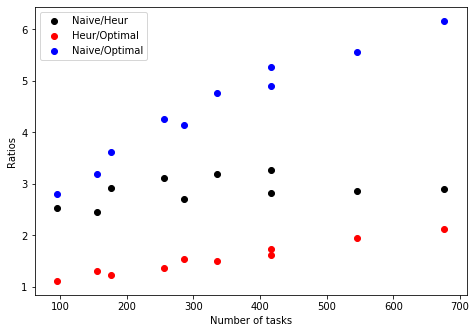

In [10]:
import matplotlib.pyplot as plt
import math

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


#print(ub_ratio)
#plt.scatter(obj_lb_lst[:,0], obj_lb_lst[:,1], label='lower bound', color="g", linewidths=0.1)


# plt.scatter(x, y, s=5, label='opt/lb', color='b')
plt.scatter(x, ratios1, label='Naive/Heur', color='k')
plt.scatter(x, ratios2, label='Heur/Optimal', color='r')
plt.scatter(x, ratios3, label='Naive/Optimal', color='b')
#plt.scatter(x, naives, label='Naives', color='g')
plt.xlabel('Number of tasks')
plt.ylabel('Ratios')
plt.legend()
plt.show()

In [12]:
import csv
with open("soykb_naive_heur_3_machines.csv", 'w+') as f:
    writer = csv.writer(f)
    writer.writerow(["task_size", "optimal", "naive", "heuristic", "lowerbound", "upperbound"])
    writer.writerows(zip(x, y, naives, heur, lbs, ubs))